# DSCI 100 Section 005 Group 7 Project Proposal

In [11]:
library(tidyverse)
library(tidymodels)
library(repr)

Rows: 1003 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): first, last, team
dbl  (20): year, games_played, fgm, fga, fg3m, fg3a, ftm, fta, oreb, dreb, r...
time  (1): min

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


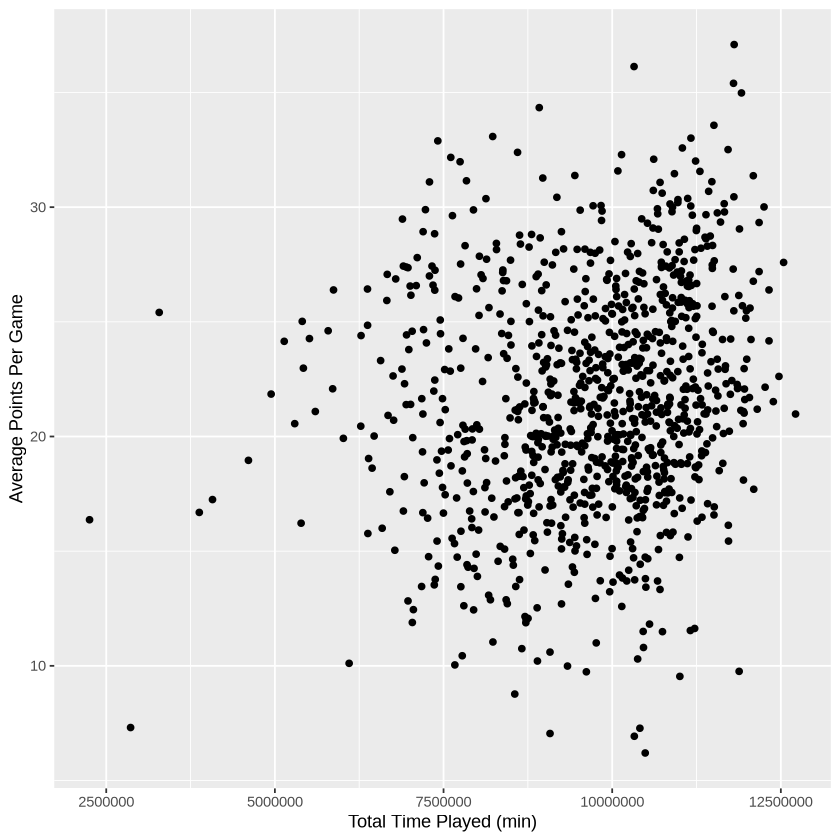

In [21]:
all_star_data <- read_csv("data/final_data.csv")

all_star_data_refined <- mutate(all_star_data, total_min_played = games_played * min, name = paste(first, last)) |>
    select(name, pts, total_min_played)

all_star_plot <- all_star_data_refined |>
    ggplot(aes(x = total_min_played, y = pts)) +
    geom_point() +
    labs(x = "Total Time Played (min)", y = "Average Points Per Game")

all_star_plot